In [1]:
import cv2
import os

IMAGES_PATH = 'trapcamsample/'

images_list = os.listdir(IMAGES_PATH)
print("%d images" % len(images_list))

904 images


In [2]:
images_list = sorted(images_list)
images_list[:10]

['d19975s54i1.jpg',
 'd19975s54i10.jpg',
 'd19975s54i2.jpg',
 'd19975s54i3.jpg',
 'd19975s54i4.jpg',
 'd19975s54i5.jpg',
 'd19975s54i6.jpg',
 'd19975s54i7.jpg',
 'd19975s54i8.jpg',
 'd19975s54i9.jpg']

In [3]:
images_by_seq = [x.split('i') for x in images_list if x.endswith('jpg')]
images_by_seq[:10]
seq_dict = {}
for (seq, imgid), fn in zip(images_by_seq, images_list):
    if seq not in seq_dict:
        seq_dict[seq] = []
    seq_dict[seq].append((int(imgid.split('.')[0]), fn))
seq_dict['d22295s8']

[(1, 'd22295s8i1.jpg'),
 (2, 'd22295s8i2.jpg'),
 (3, 'd22295s8i3.jpg'),
 (4, 'd22295s8i4.jpg'),
 (5, 'd22295s8i5.jpg')]

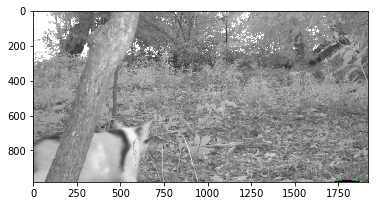

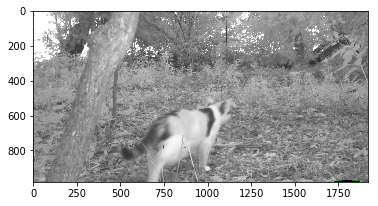

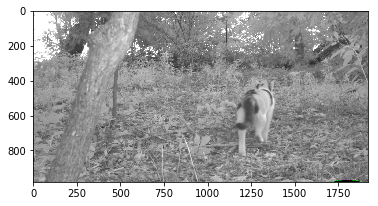

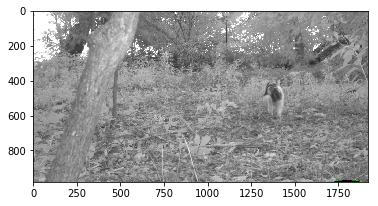

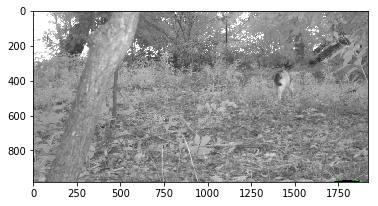

In [4]:
import matplotlib.pyplot as plt
import numpy as np

imgs = [cv2.imread(IMAGES_PATH + f[1]) for f in seq_dict['d22295s8']]
imgs = [i.astype(np.float32)/255.0 for i in imgs]
imgs = [i[50:-50,:] for i in imgs]
for i in imgs:
    plt.imshow(i)
    plt.show()

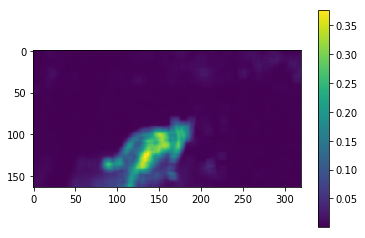

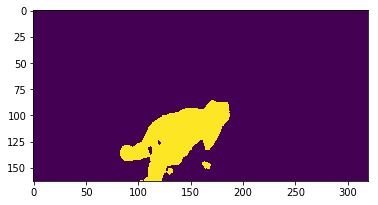

In [31]:
imgs_gray = [np.mean(i,-1) for i in imgs]
img_scale = max(imgs[0].shape[0]/320.0, imgs[0].shape[1]/320.0)
imgs_small = [cv2.resize(i, (int(i.shape[1]/img_scale),int(i.shape[0]/img_scale)), interpolation=cv2.INTER_AREA) for i in imgs_gray]
avg_img = np.median(imgs_small, 0)
diffimg = np.abs(imgs_small[1] - avg_img)
diffimg = cv2.blur(diffimg, (10,10))
plt.imshow(diffimg)
plt.colorbar()
plt.show()
thresimg = diffimg > 0.10
plt.imshow(thresimg)
plt.show()

513 1105 542 979


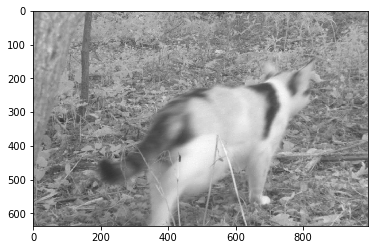

In [13]:
x1, x2 = np.where(np.any(thresimg, 0))[0][[0,-1]]
y1, y2 = np.where(np.any(thresimg, 1))[0][[0,-1]]
print(x1, x2, y1, y2)
x1 = max(0, x1 - 200)
x2 = min(imgs[1].shape[1]-1, x2 + 200)
y1 = max(0, y1 - 200)
y2 = min(imgs[1].shape[0]-1, y2 + 200)
subimg = imgs[1][y1:y2,x1:x2,:]
plt.imshow(subimg)
plt.show()

d27061s96


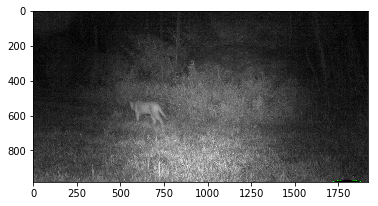

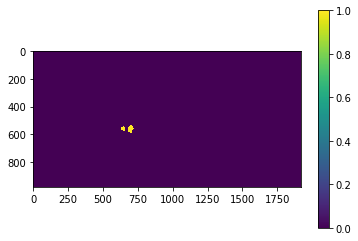

630 721 538 595


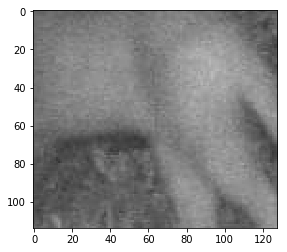

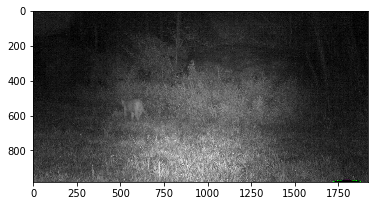

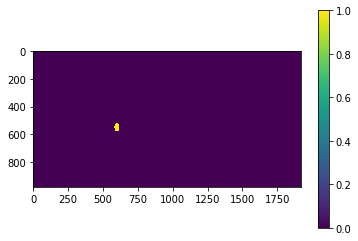

583 614 524 582


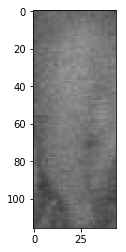

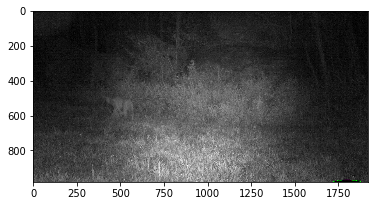

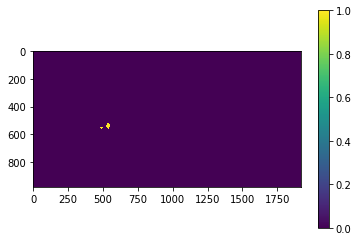

483 549 520 563


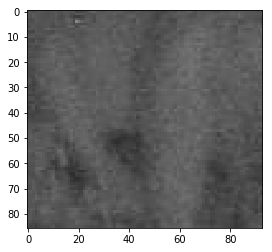

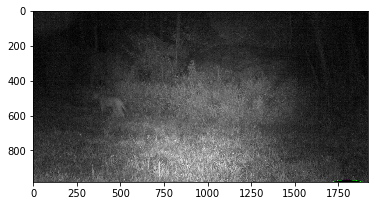

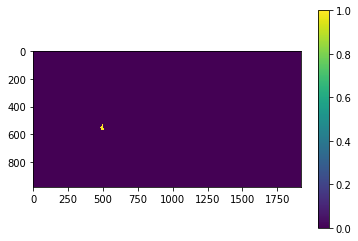

483 505 528 574


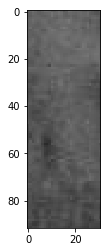

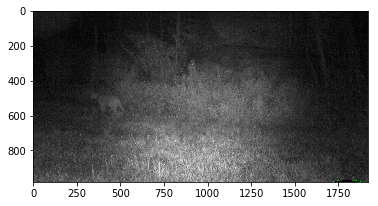

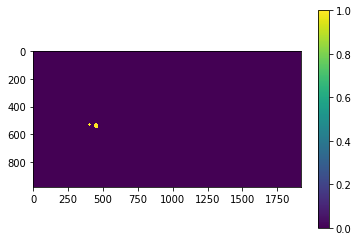

390 465 521 560


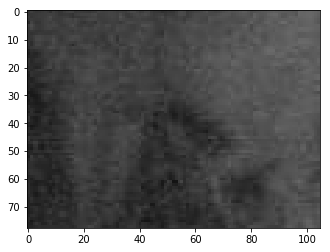

d23178s56


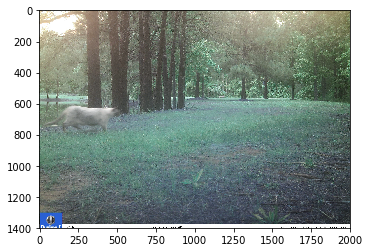

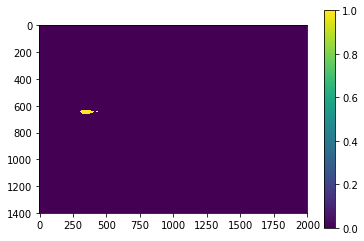

304 440 633 665


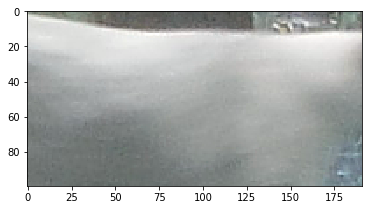

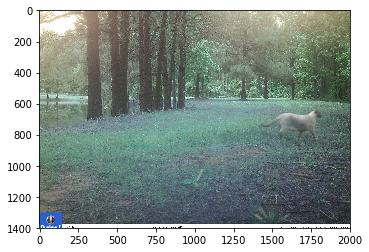

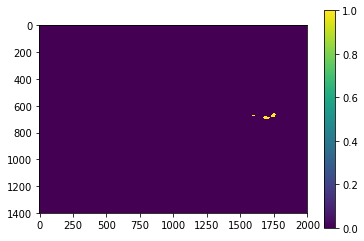

1589 1764 656 702


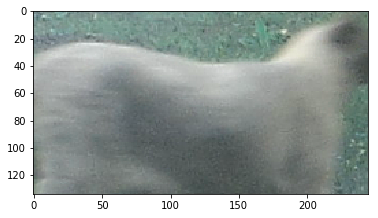

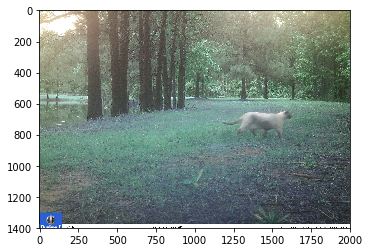

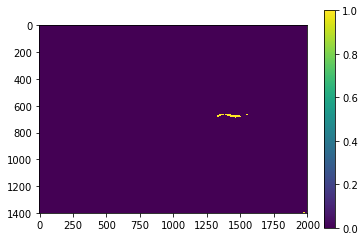

1330 1981 660 1399


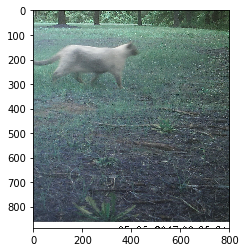

d23628s49


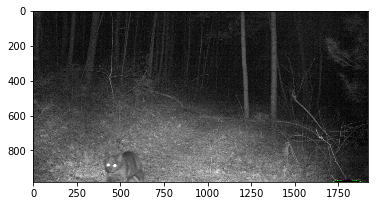

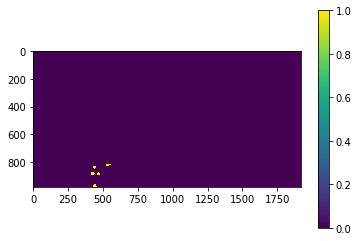

418 558 813 979


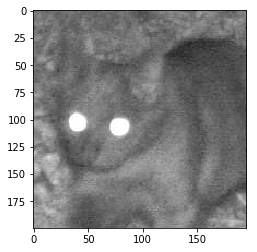

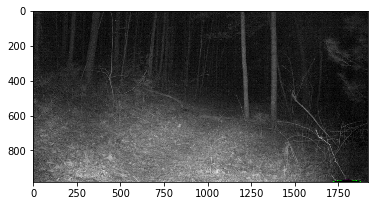

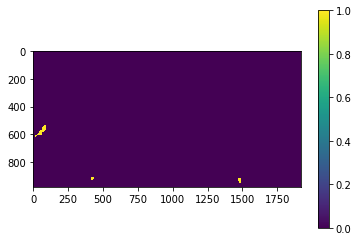

5 1492 538 949


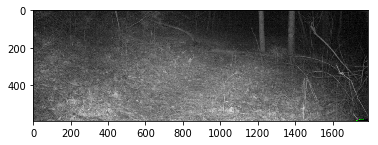

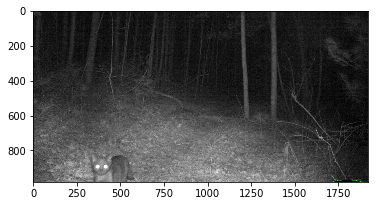

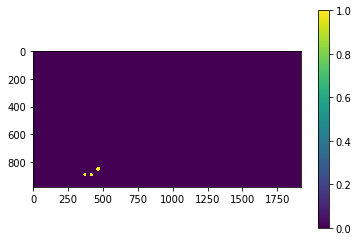

360 480 838 902


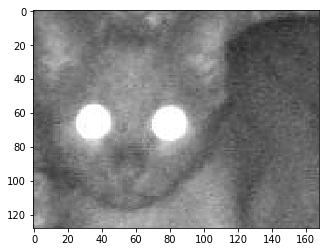

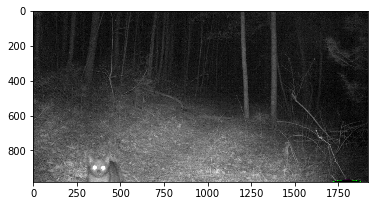

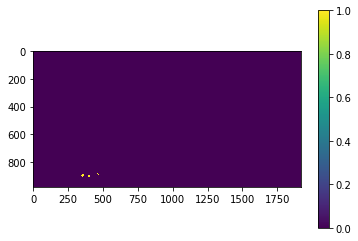

345 469 881 979


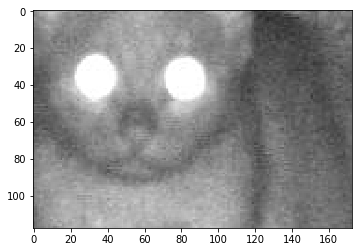

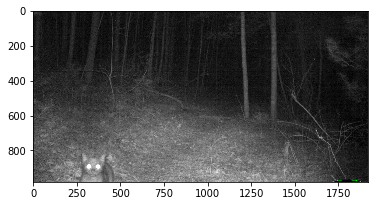

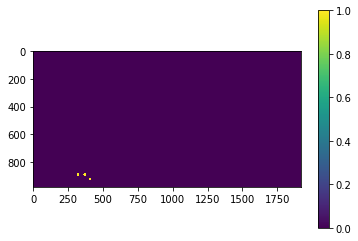

312 413 880 927


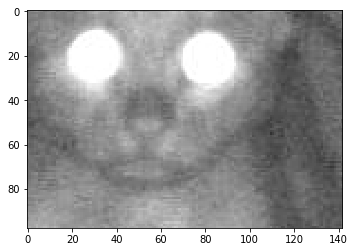

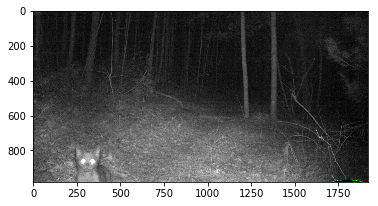

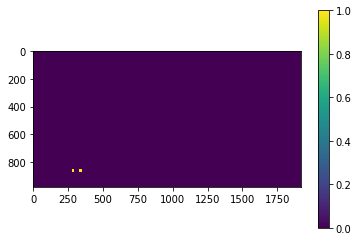

276 352 849 873


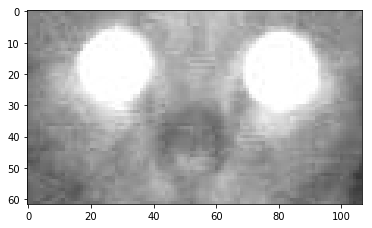

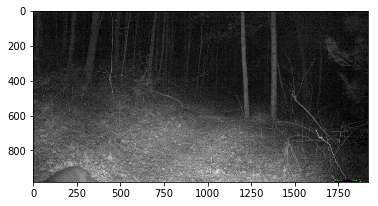

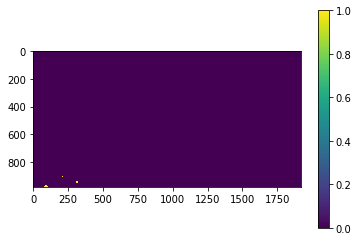

75 323 904 979


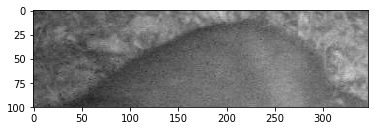

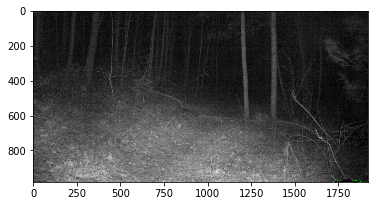

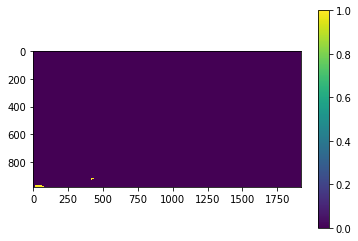

12 433 912 979


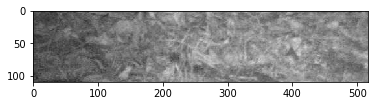

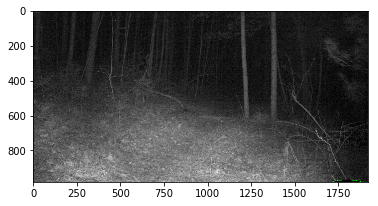

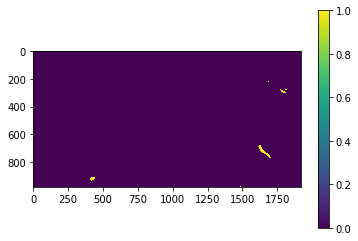

410 1819 220 979


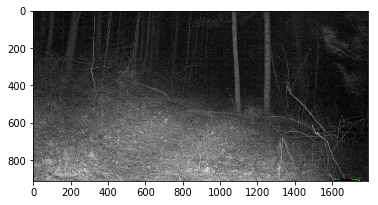

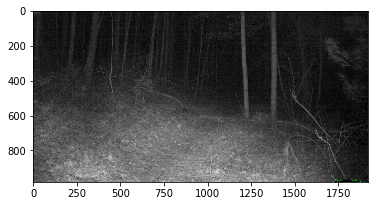

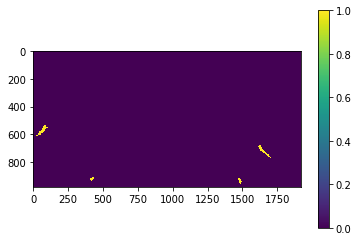

20 1701 536 959


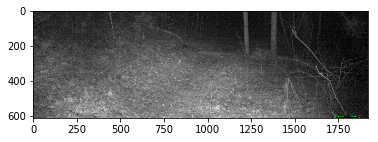

d32927s29


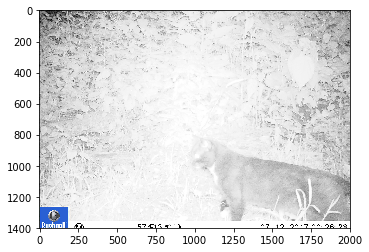

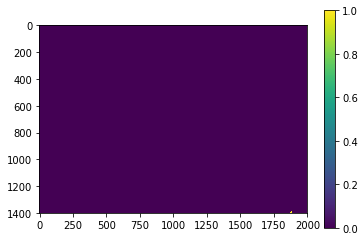

1874 1887 1384 1399


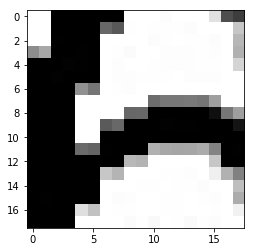

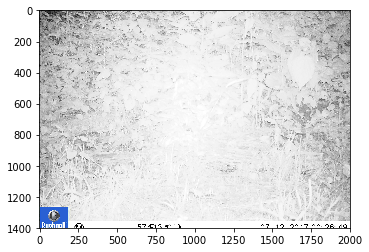

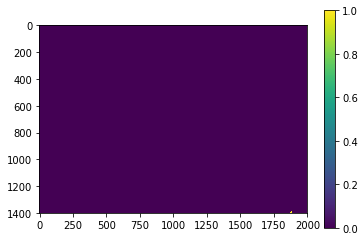

1874 1969 1384 1399


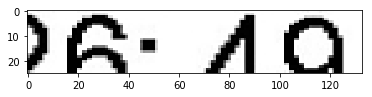

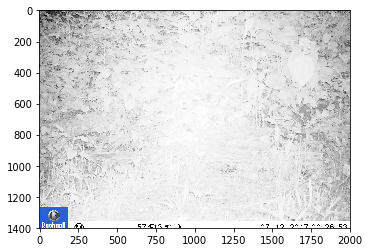

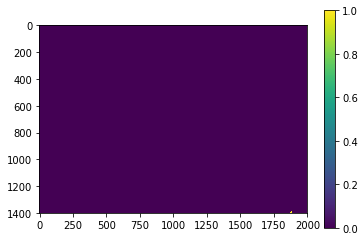

1874 1887 1384 1399


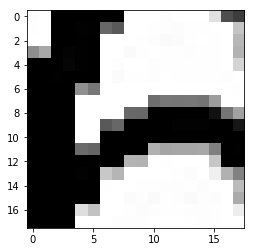

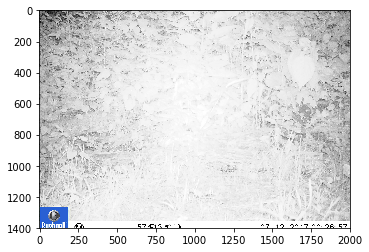

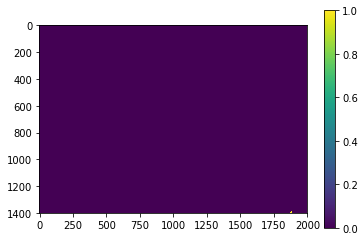

1874 1887 1384 1399


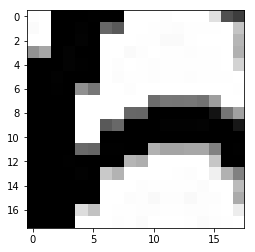

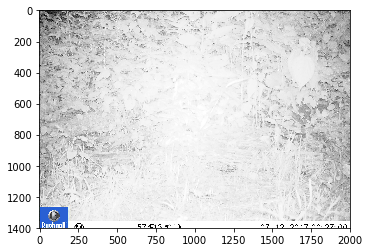

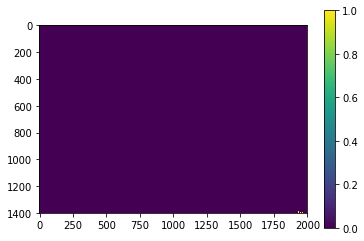

1932 1971 1387 1399


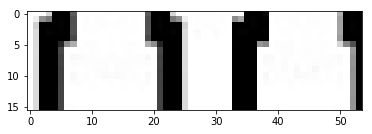

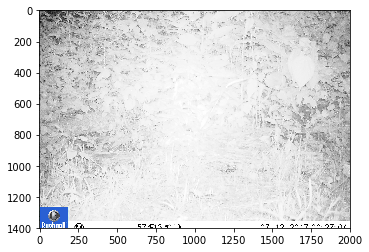

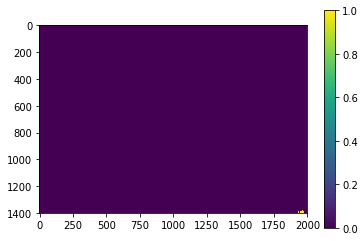

1932 1975 1381 1399


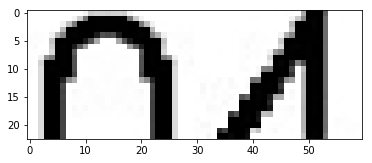

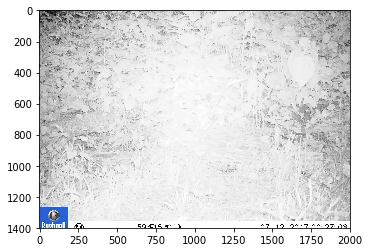

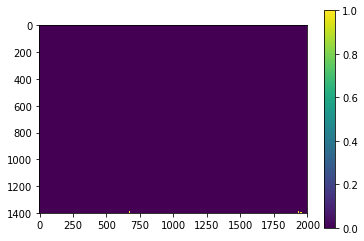

670 1959 1386 1399


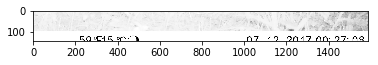

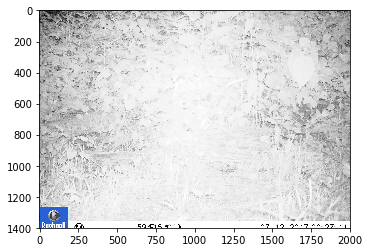

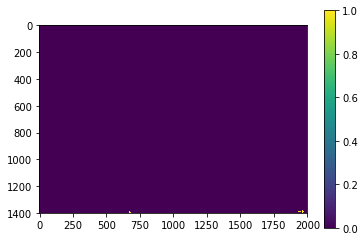

669 1976 1378 1399


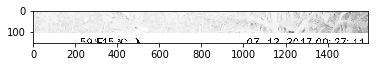

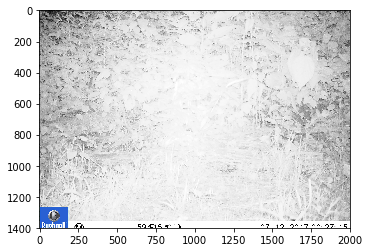

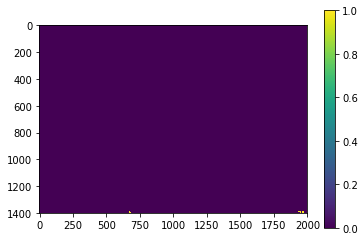

669 1974 1382 1399


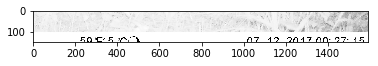

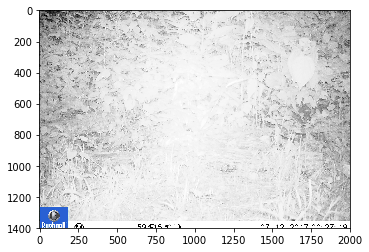

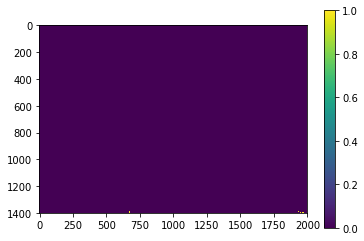

670 1975 1385 1399


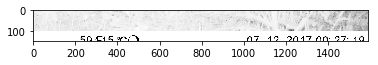

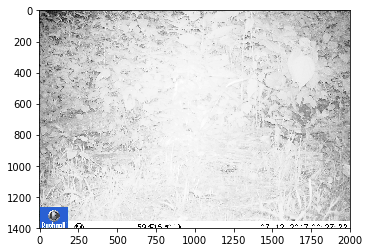

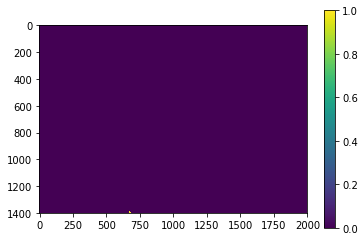

669 682 1385 1399


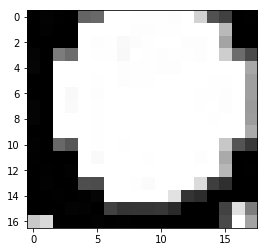

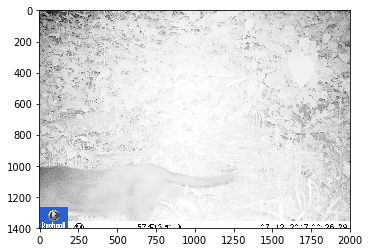

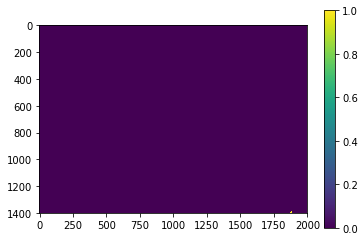

1874 1969 1384 1399


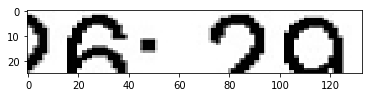

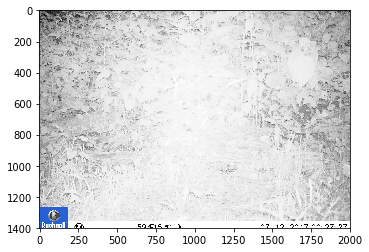

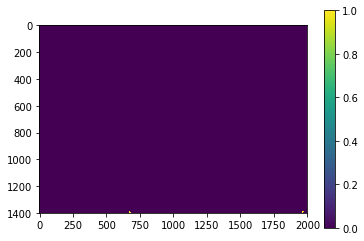

669 1973 1383 1399


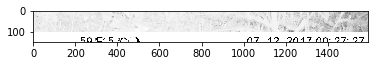

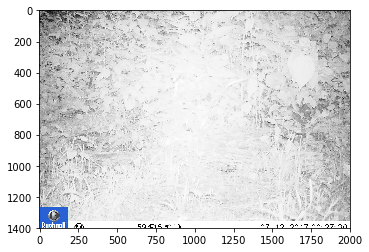

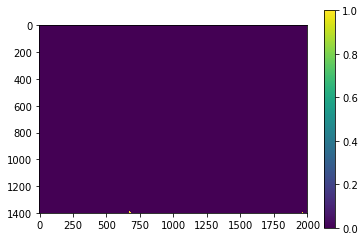

669 1972 1385 1399


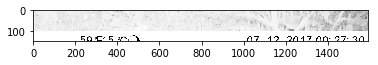

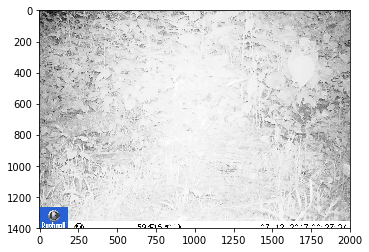

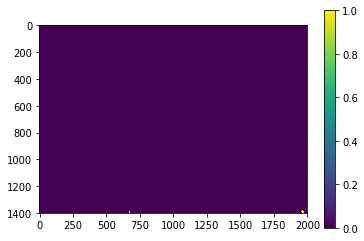

670 1975 1380 1399


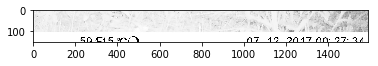

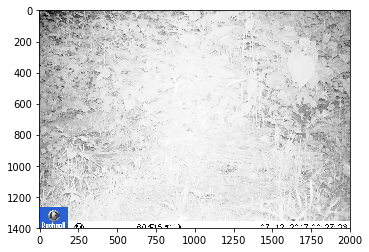

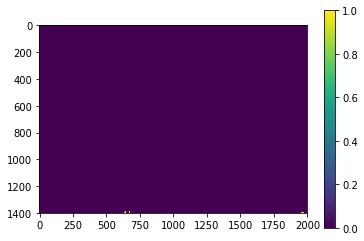

636 1973 1384 1399


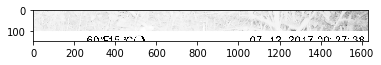

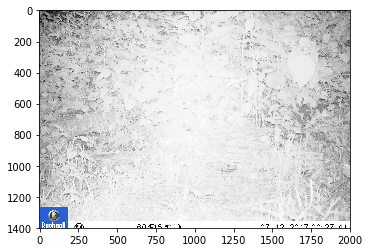

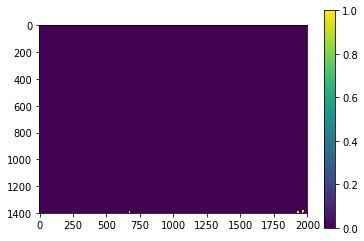

644 1977 1376 1399


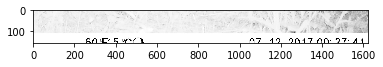

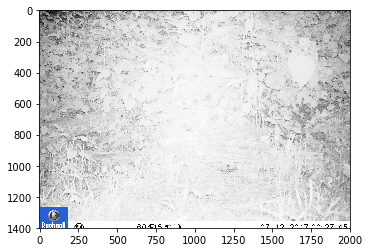

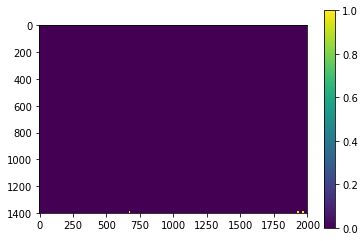

673 1975 1382 1399


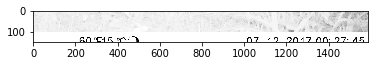

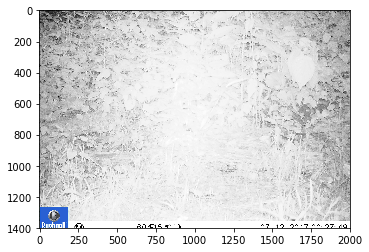

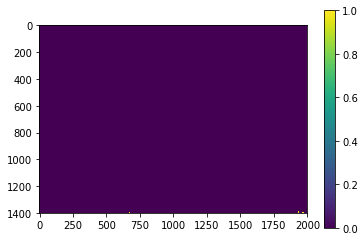

674 1975 1386 1399


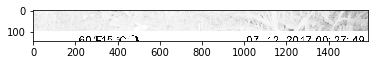

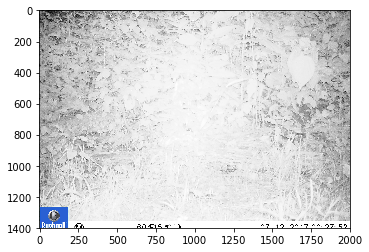

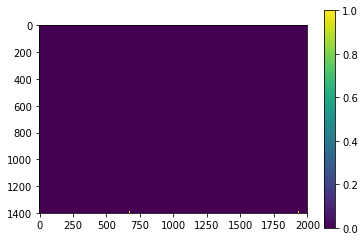

643 1971 1382 1399


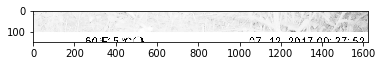

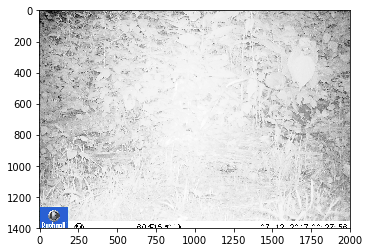

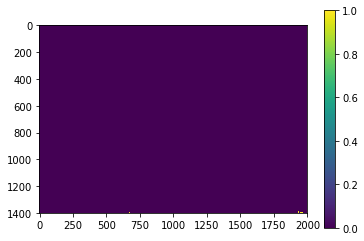

674 1972 1386 1399


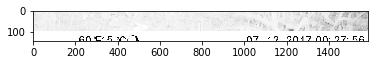

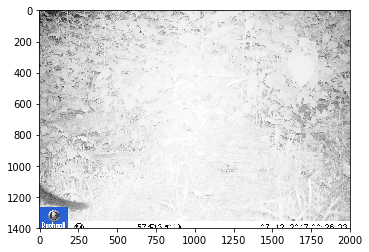

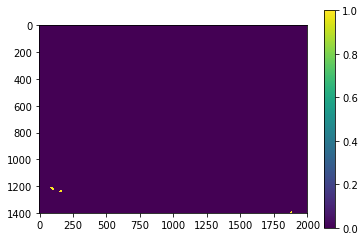

33 1887 1173 1399


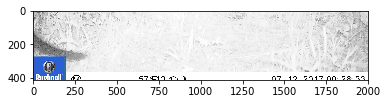

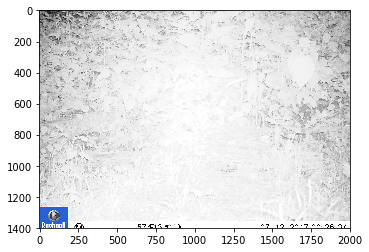

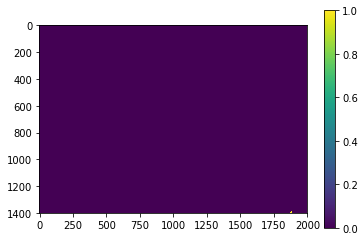

1874 1887 1384 1399


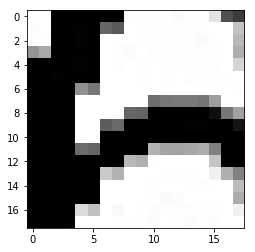

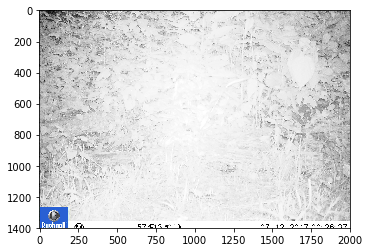

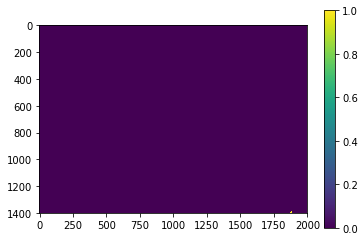

1874 1887 1384 1399


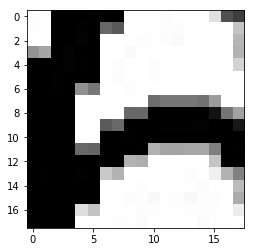

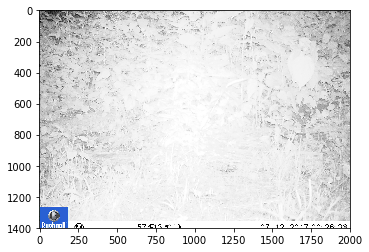

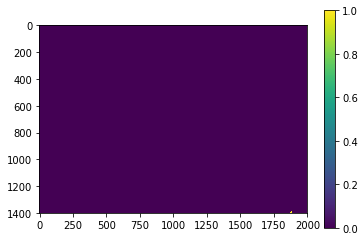

1874 1887 1384 1399


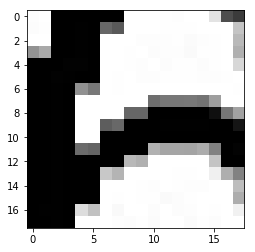

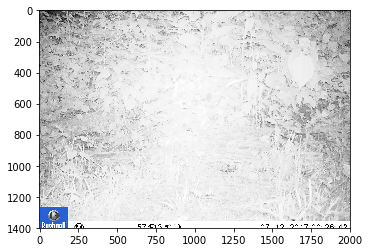

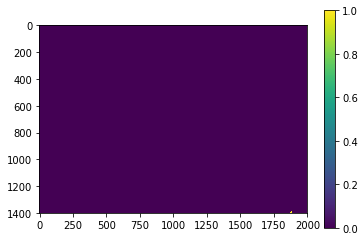

1874 1887 1384 1399


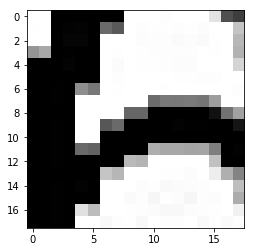

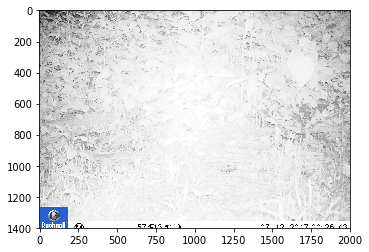

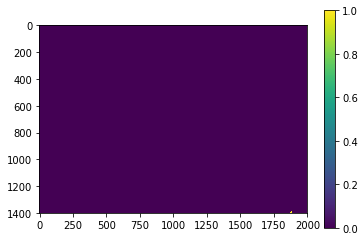

1874 1887 1384 1399


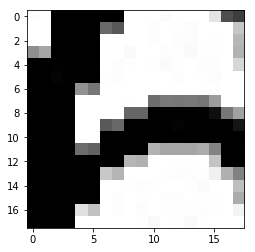

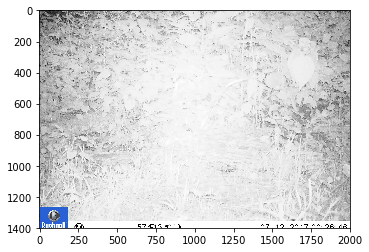

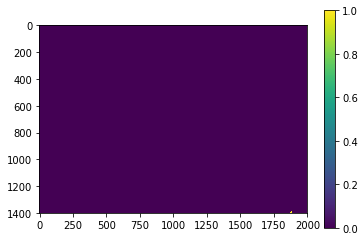

1874 1969 1384 1399


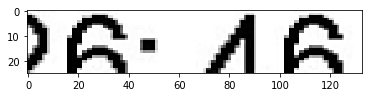

In [32]:
nimgs = 0
for seq in seq_dict.keys():
    img_list = seq_dict[seq]
    if len(img_list) < 3:
        continue
    print(seq)
    imgs = [cv2.imread(IMAGES_PATH + f[1]) for f in img_list]
    imgs = [i.astype(np.float32)/255.0 for i in imgs]
    imgs = [i[50:-50,:] for i in imgs]
    avg_img = np.mean(np.median(imgs, axis=0), axis=-1)
    for i in imgs:
        diffimg = np.abs(np.mean(i,-1) - avg_img)
        diffimg = cv2.blur(diffimg, (25,25))
        thresimg = diffimg > np.max(diffimg) * 0.7
        plt.imshow(i)
        plt.show()
        plt.imshow(thresimg)
        plt.colorbar()
        plt.show()
        x1, x2 = np.where(np.any(thresimg, 0))[0][[0,-1]]
        y1, y2 = np.where(np.any(thresimg, 1))[0][[0,-1]]
        w=x2-x1
        h=y2-y1
        w = max(w, h/2)
        h = max(h, w/2)
        print(x1, x2, y1, y2)
        x1 = max(0, x1 - w*0.2)
        x2 = min(i.shape[1]-1, x2 + w*0.2)
        y1 = max(0, y1 - h*0.2)
        y2 = min(i.shape[0]-1, y2 + h*0.8)
        subimg = i[int(y1):int(y2),int(x1):int(x2),:]
        plt.imshow(subimg)
        plt.show()
        nimgs += 1
    if nimgs > 40:
        break
